# Лабораторная работа №1: Проведение исследований с алгоритмом KNN

## 1. Выбор начальных условий

### A. Задача классификации

Для решения задачи классификации был выбран датасет для классификации качества вина, на основе содержания различных веществ. Решение данной задачи поможет автоматизировать процесс выявления качества вина, что поможет оптимизировать бизнес процессы.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print(path)

100%|██████████| 21.5k/21.5k [00:00<00:00, 27.2MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [ ]:
%%shell
ls /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1

WineQT.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Б. Задача регрессии
Для решения задачи регрессии было решено использовать датасет для предсказания цены жилья, по различным характеристикам, таким как площадь, количество спален и т.д.
Данный датасет имеет большое практическое применение в сферах риэлторства и продажи жилья, что позволит оптимизировать процесс оценки и предлагать наиболее правильные и выгодные цены

In [ ]:
path = kagglehub.dataset_download("shree1992/housedata")

print(path)

100%|██████████| 432k/432k [00:00<00:00, 58.6MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/shree1992/housedata/versions/2


In [ ]:
%%shell
ls /root/.cache/kagglehub/datasets/shree1992/housedata/versions/2

data.csv  data.dat  output.csv


In [ ]:
df_reg = pd.read_csv("/root/.cache/kagglehub/datasets/shree1992/housedata/versions/2/data.csv")
df_reg.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df_reg.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [ ]:
df_reg.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### C. Выбрать метрики качества
- Для задачи классификации я выбрал как основные метрики Accuracy, т.к. она является классической метрикой и позволяет получить какое-то представление о качестве модели по всем классам. Также для классификации я выбрал F1 меру, т.к. она является совмещением двух метрик Precision и Recall и позволяет оценить качество модели по отдельным классам
- Для задачи регрессии я выбрал метрики RMSE, т.к. она позволит оценить модель в тех же единицах, что она предсказывает. Также я выбрал $R^2$ т.к. данная метрика позволяет в целом оценить модель.

## 2. Создание бейзлайна и оценка качества

Сначала для подготовим датасеты для обучения. Удалим из датасета для классификации Id, а из датасета для регрессии некоторые признаки, такие как дата, улица и страна (Улицы уникальны для каждого дома и не несут информации, страна одинакова для всех домов)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, root_mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
scaler = MinMaxScaler()

In [ ]:
df = df.drop(columns=['Id'])

In [ ]:
y_class = df['quality']
X_class = df.drop(columns=['quality'])

Разделим датасет для классификации на обучающую и тестовую выборку

In [ ]:
X_class_scaled = scaler.fit_transform(X_class)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.2, random_state=3525, shuffle = True
)

Для датасета, который предназначен для регрессионной модели, попробуем использовать One Hot Encoding для категориальных признаков. Улицы почти что уникальны для каждого дома, поэтому мы можем их убрать. Также как страну и дату, т.к. они одинаковы для всех.

In [ ]:
df_reg = df_reg.drop(columns=['street', 'country', 'date'])

In [ ]:
categorical_features = ['city', 'statezip']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(df_reg[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_cols = encoder.get_feature_names_out(categorical_features)

In [ ]:
df_reg[encoded_cols] = encoder.fit_transform(df_reg[categorical_features])

In [ ]:
df_reg.drop(columns=categorical_features, inplace=True)

In [ ]:
df_reg.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_reg = df_reg['price']
X_reg = df_reg.drop(columns=['price'])

In [ ]:
y_reg

,price
0,3.130000e+05
1,2.384000e+06
2,3.420000e+05
3,4.200000e+05
4,5.500000e+05
...,...
4595,3.081667e+05
4596,5.343333e+05
4597,4.169042e+05
4598,2.034000e+05


In [ ]:
scaler_reg = MinMaxScaler()
X_reg[:] = scaler_reg.fit_transform(X_reg)

Аналогично разделим датасет для регрессии

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=64, shuffle = True
)

Обучим и оценим модель для классификации

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_class, y_train_class)

KNeighborsClassifier()

In [ ]:
y_pred_class = knn_class.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print("KNN Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

KNN Classification Results:
Accuracy: 0.5939
F1 Score: 0.5866


Как можем заметить, точность для не подготовленных данных получилась достаточно высокой. Возможно, улучшение бейзлайна поможет ещё сильнее улучшить ситуацию

Рассмотрим теперь регрессионную модель

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)

KNeighborsRegressor()

In [ ]:
y_pred_reg = knn_reg.predict(X_test_reg)
rmse = root_mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nKNN Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.4f}")


KNN Regression Results:
RMSE: 319024.15
R^2: 0.2929


Можем заметит, что для регрессионной модели на базовом бейзлайне были получены не самые лучшие результаты. Даже испоьзование One Hot Encoding не смогло сделать модель достаточно применимой (т.к. отклонение от реальной цены составляет около 300 тысяч долларов)

## Улучшение бейзлайна

### А. Формирование гипотиз

Попробуем изучить наши данные, поищем закономерности, почистим от выбросов, составим гипотезы, чтобы улучшить наш бейзлайн
Для начала построим матрицу корреляции

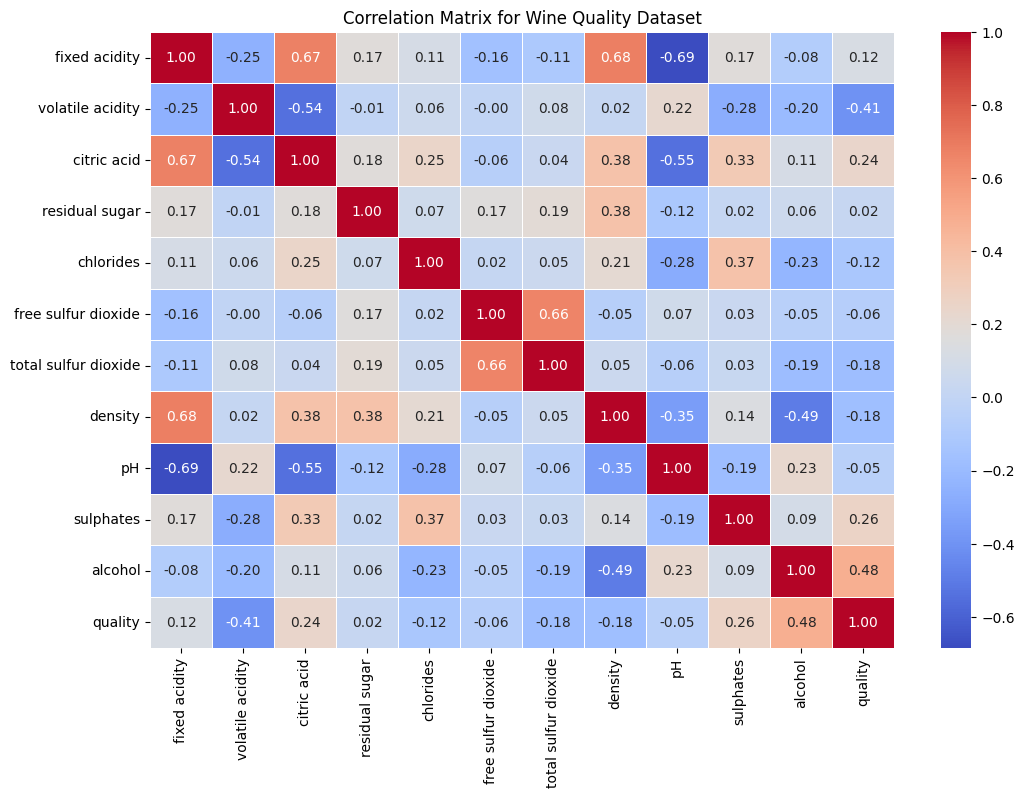

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1/WineQT.csv')

df = df.drop(columns=['Id'])

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Wine Quality Dataset")
plt.show()

Как можно заметить, на качество самое сильное влияние оказывает содержание алкоголя (что конечно логично). Сильных корреляций нет. Такой признак как residual sugar можно убрать из-за слабой корреляции

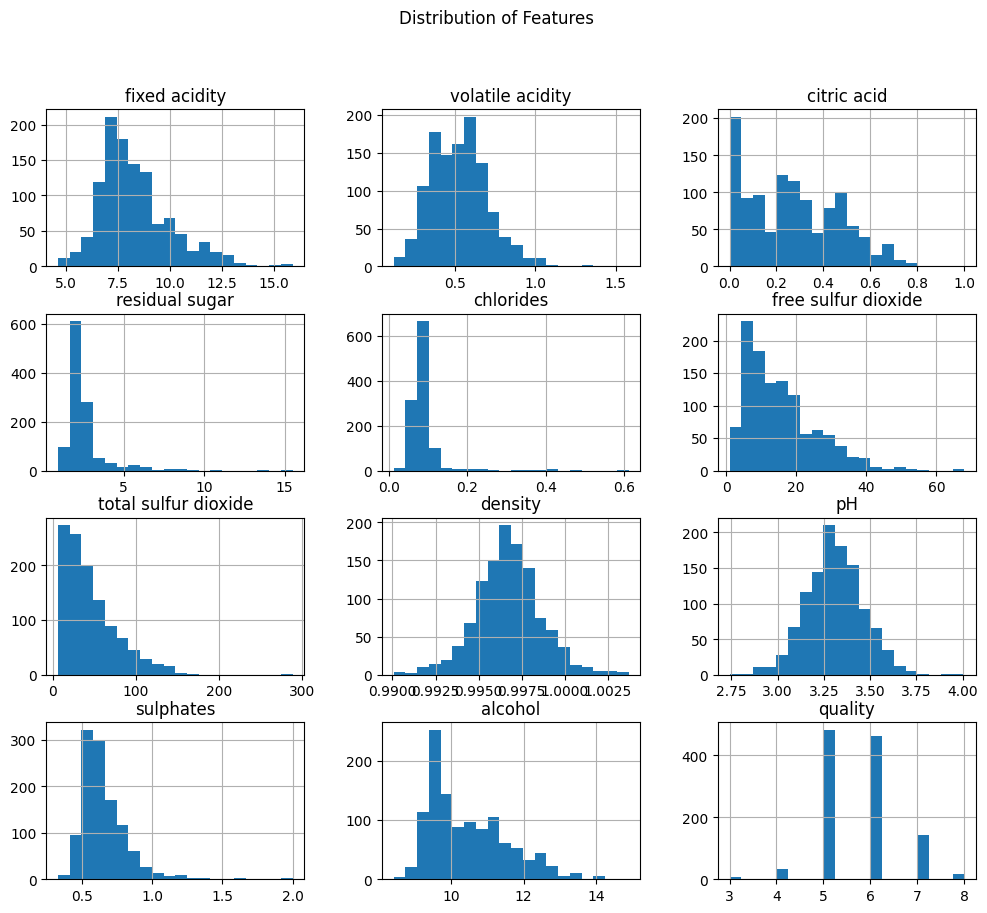

In [ ]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Features")
plt.show()

Можно заметить, что в данном датасете преобраладают вина с 5-7 качеством, что ведет делает их предсказание более лучшим. Многие данные распределены нормально,но с перекосом, с помощью логарифмических преобразований это можно улучшить

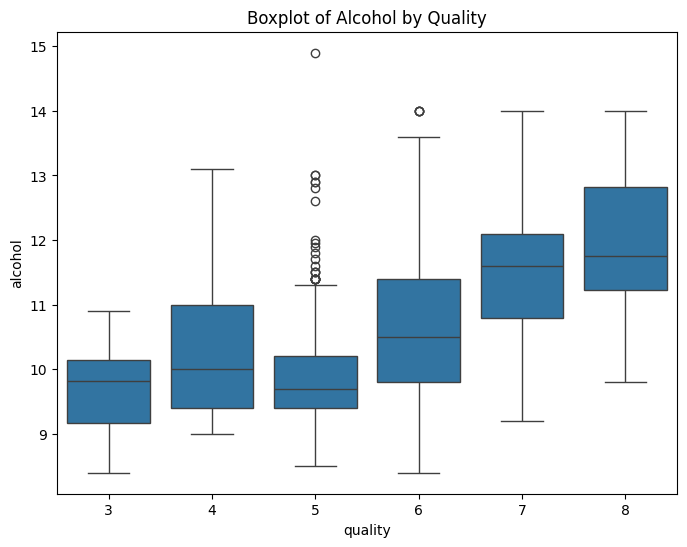

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Boxplot of Alcohol by Quality")
plt.show()

"Ящик с усами" для алкоголя и качества не дал полезных данных. Как ранее было замечено, большее количество качества сосредоточено в диапазоне от 5 до 7, поэтому нельзя сказать о выбросах

В итоге для классификации я принял решение убрать признак с самой низкой корреляцией, а также применить логарифм к данным с сильным перекосом от нормального.

In [ ]:
df_reg = pd.read_csv("/root/.cache/kagglehub/datasets/shree1992/housedata/versions/2/data.csv")
df_reg = df_reg.drop(columns=['date', 'street', 'country'])

city_price = df_reg.groupby('city')['price'].mean()
df_reg['city_encoded'] = df_reg['city'].map(city_price)

statezip_price = df_reg.groupby('statezip')['price'].mean()
df_reg['statezip_encoded'] = df_reg['statezip'].map(statezip_price)
df_reg = df_reg.drop(columns=['city', 'statezip'])
df_reg.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_encoded,statezip_encoded
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,420392.364047,374433.232975
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,579837.467282,914441.496599
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,439492.444648,320243.968571
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,847180.662995,602963.100000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,667649.534781,637555.719367


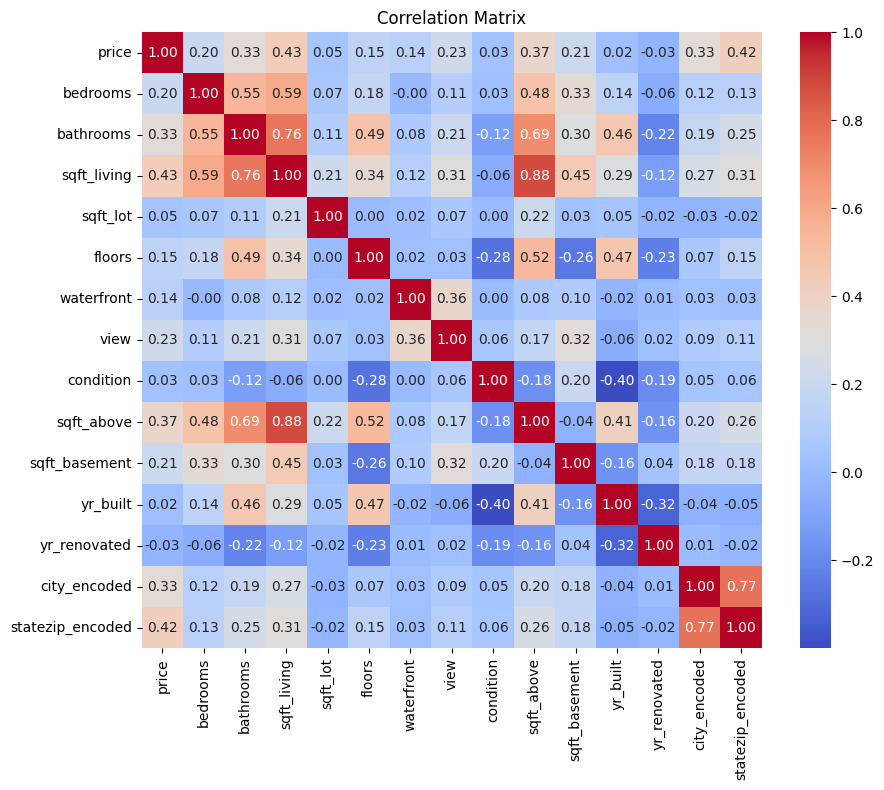

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_reg.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Можно заметить, что цена плохо коллелирует с датой постройки, sqft_lot, condition и yr_renovated поэтому можно отбросить данные фичи. Также наблюдается сильная связь между sqft_living и sqft_above. Поэтому их можно объединить в один признак.

Попробуем еще построить boxplots для всех числовых признаков в нашем датасете

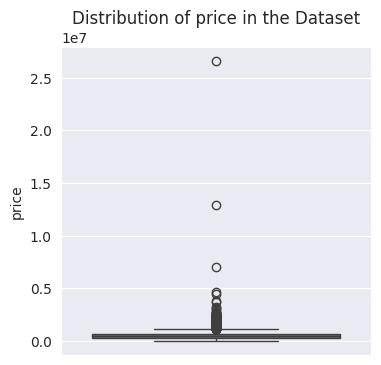

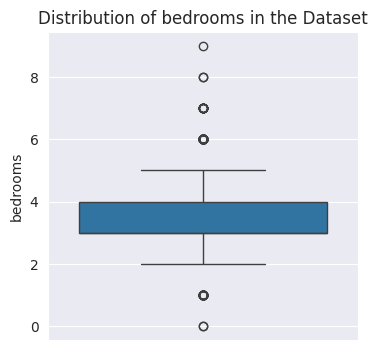

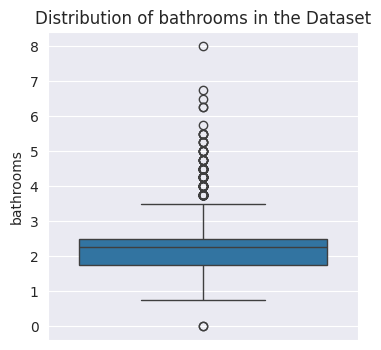

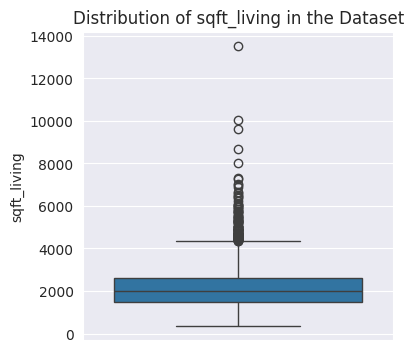

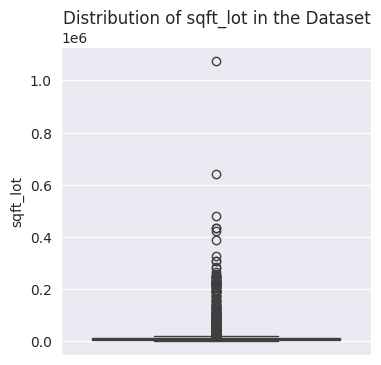

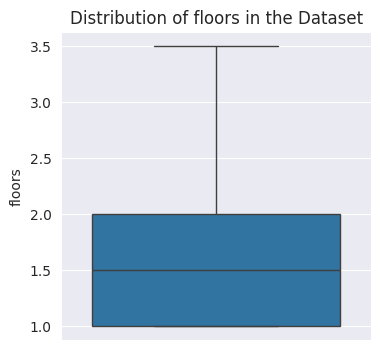

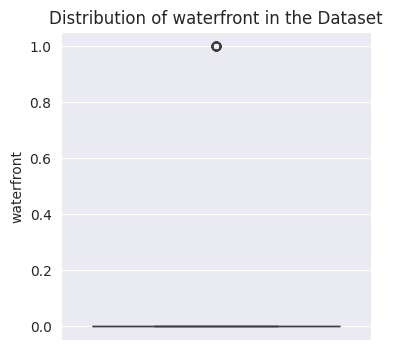

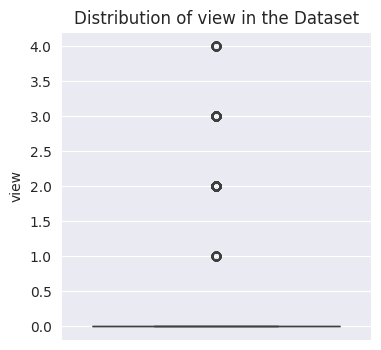

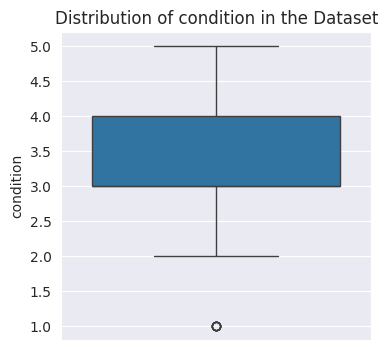

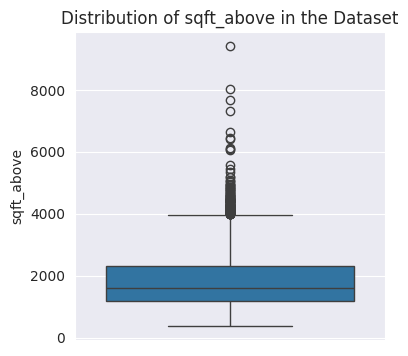

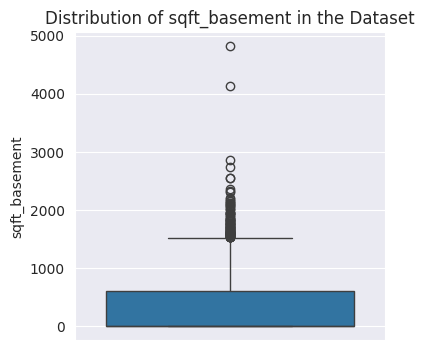

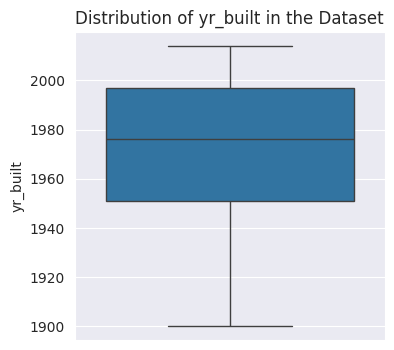

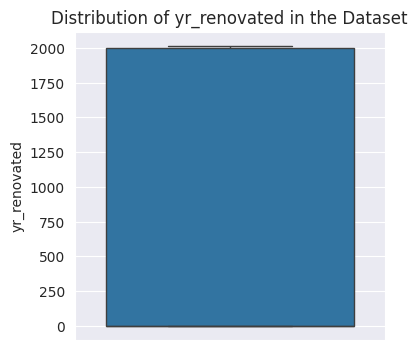

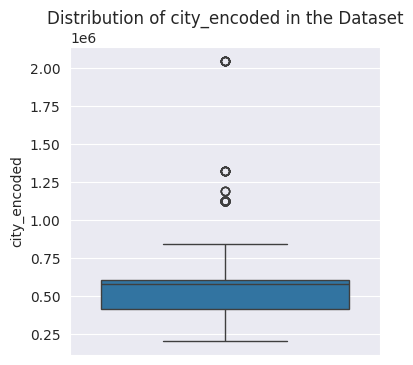

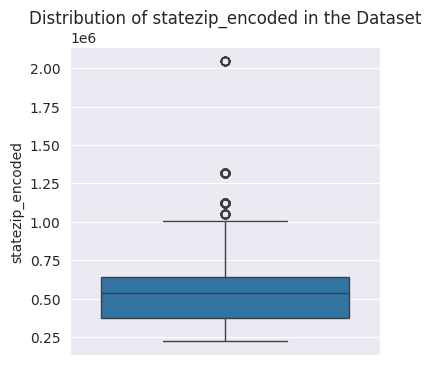

In [ ]:
columns=df_reg.select_dtypes(include=['number'])
for col in columns:
    plt.figure(figsize=(4,4))
    sns.set_style('darkgrid')
    sns.boxplot(df_reg,y=col)
    plt.title(f'Distribution of {col} in the Dataset')
    plt.show()

В сравнении с числовыми признаками, закодированные категориальные имеют не так много выбросов. Попробуем уменьшить количество выбросов

#### Итоги
- Классификация
  1. Попробуем убрать residual sugar и pH из-за слабой корреляции
  2. Примением логарифмическое преобразование к признакам с сильным перекосом
  3. Кросс-валидация
- Регрессия
  1. Попробуем оставить OneHotEncoding
  2. Уберем yr_built, sqft_lot, condition и yr_renovated из-за низкой корреляции
  3. Уменьшим число выбросов в числовых признаках
  4. Кросс-валидация

### C.D.E. Формирование улучшенного бейзлайна и обучение моделей. Оценка новых моделей

Разделим данные на train и test. Train будем использовать для кроссвалидации

In [ ]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1/WineQT.csv')

df = df.drop(columns=['residual sugar', 'pH'])

df['total sulfur dioxide'] = np.log1p(df['total sulfur dioxide'])
df['free sulfur dioxide'] = np.log1p(df['free sulfur dioxide'])

X = df.drop(columns=['quality', 'Id'])
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(3, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='weighted')
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=656)

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=656, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(3, 11),
                         'weights': ['uniform', 'distance']},
             refit='f1',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, response_method='predict', average=weighted)})

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)
print("Test F1 Score:", f1)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Test Accuracy: 0.6375545851528385
Test F1 Score: 0.6224618761288553


In [ ]:
best_model_class = grid_search.best_estimator_

Как можно заметить, значение метрики улучшились после применения нового бейзлайна и перебора гиперпараметров.

In [ ]:
df_reg = pd.read_csv("/root/.cache/kagglehub/datasets/shree1992/housedata/versions/2/data.csv")

In [ ]:
df_reg = df_reg.drop(columns=['yr_built', 'sqft_lot', 'condition', 'yr_renovated', 'country', 'street', 'date'])

In [ ]:
df_reg.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,statezip
0,313000.0,3.0,1.50,1340,1.5,0,0,1340,0,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,2.0,0,4,3370,280,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,1.0,0,0,1930,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,1.0,0,0,1000,1000,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,1.0,0,0,1140,800,Redmond,WA 98052


In [ ]:
numerical_features = ['price', 'sqft_living', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms']

for col in numerical_features:
    Q1 = df_reg[col].quantile(0.25)
    Q3 = df_reg[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_reg = df_reg[(df_reg[col] >= lower_bound) & (df_reg[col] <= upper_bound)]

In [ ]:
df_reg.shape

(4072, 11)

In [ ]:
X = df_reg.drop(columns=['price'])
y = df_reg['price']

Предобратаем данные пере испльзованиям кросс валидации

In [ ]:
categorical_features = ['city', 'statezip']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
y

,price
0,313000.000000
2,342000.000000
3,420000.000000
4,550000.000000
5,490000.000000
...,...
4595,308166.666667
4596,534333.333333
4597,416904.166667
4598,203400.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=6634)

In [ ]:
X_train.shape

(3257, 129)

In [ ]:
y_train.shape

(3257,)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [ ]:
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

scoring = make_scorer(r2_score)

# Кросс-валидация и GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=5456)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)


In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=5456, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(3, 11),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(r2_score, response_method='predict'))

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best parameters:", grid_search.best_params_)
print("Test RMSE:", rmse)
print("Test R^2 Score:", r2)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Test RMSE: 113414.29020609922
Test R^2 Score: 0.6902982909040898


Регрессия показала намного более значимый прирост, т.к. параметр $R^2$ стал равен почти 70%.

### F. Сравнение результатов
- Классификация

|          | Первый baseline | Улучшенный baseline |
|----------|-----------------|---------------------|
| Accuracy | 0.5939          | 0.6375              |
| F1       | 0.5866          | 0.6224              |

- Регрессия

|       | Первый baseline | Улучшенный baseline |
|-------|-----------------|---------------------|
| RMSE  | 319024.15       | 113414.29           |
| $R^2$ | 0.2929          | 0.6902              |

### G. Выводы

Как можем заметить, для задачи классификации работа с фичами не дала сильного прироста точности. Скорее всего это связно с особенностями датасета (Сильное смещение на качество от 5 до 7), а также отсутствие сильных корреляций. Возможно в дальнейшем при использовании нелинейных моделей получится сильно повысить точность

Для задачи регресии же наоборот, feature engineering помог сильно улучшить метрики. Учитывая, что цены в датасете начинаются с $10^5$, а заканчиваются в $10^7$ то результат уже можно назвать приемлемым. Также нельзя не отметить перебор гиперпараметров, что позволило еще сильнее повысить метрики. Возможно, также так сильно улучшить метрики помогло использование StandardScaler вместо MinMaxScaler. Т.к. большинство численных метрик в датасете для регрессии имеет различные размеры, то использование скейлера (нормализатора) помогает применять алгоритм KNN для данной задачи

## 4.	Имплементация алгоритма машинного обучения

### A.	Самостоятельно имплементировать алгоритмы машинного обучения

Напишем собственную имплементацию алгоритма KNN. Реализуем его в более общем виде и будем параметризовать для каждой конкретной задачи

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, n_neighbors=3, task='classification'):
        self.n_neighbors = n_neighbors
        self.task = task

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            # Я решил использовать евклидову меру, как самую простую
            distances = [self._euclidean_distance(x, x_train_dist) for x_train_dist in self.X_train]
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_values = [self.y_train[i] for i in k_indices]

            if self.task == 'classification':
                most_common = Counter(k_nearest_values).most_common(1)
                predictions.append(most_common[0][0])
            elif self.task == 'regression':
                predictions.append(np.mean(k_nearest_values))
            else:
                raise ValueError("task должен быть 'classification' или 'regression'")
        return predictions

Также реализуем основные метрики, которые мы используем в исследовании моделей

### B.	Обучить имплементированные модели

In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1/WineQT.csv")
df = df.drop(columns=['Id'])
y_class = df['quality']
X_class = df.drop(columns=['quality'])
X_class_scaled = scaler.fit_transform(X_class)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.2, random_state=3574, shuffle = True
)

In [ ]:
knn_class = KNN(n_neighbors=3, task='classification')
knn_class.fit(X_train_class, y_train_class)

In [ ]:
print("KNN Classification Results:")
print(f"Accuracy: {accuracy_score(y_test_class, knn_class.predict(X_test_class)):.4f}")
print(f"F1 Score: {f1_score(y_test_class, knn_class.predict(X_test_class), average='weighted'):.4f}")

KNN Classification Results:
Accuracy: 0.5983
F1 Score: 0.5983


Проделаем тоже самое и для регрессии

In [ ]:
df_reg = pd.read_csv("/root/.cache/kagglehub/datasets/shree1992/housedata/versions/2/data.csv")
df_reg = df_reg.drop(columns=['street', 'country', 'date'])
categorical_features = ['city', 'statezip']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(df_reg[categorical_features])
encoded_cols = encoder.get_feature_names_out(categorical_features)
df_reg[encoded_cols] = encoder.fit_transform(df_reg[categorical_features])
df_reg.drop(columns=categorical_features, inplace=True)
y_reg = df_reg['price']
X_reg = df_reg.drop(columns=['price'])
scaler_reg = MinMaxScaler()
X_reg[:] = scaler_reg.fit_transform(X_reg)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=4668, shuffle = True
)

In [ ]:
knn_reg = KNN(n_neighbors=5, task='regression')
knn_reg.fit(X_train_reg, y_train_reg)

In [ ]:
y_pred_reg = knn_reg.predict(X_test_reg)
print("KNN Regression Results:")
print(f"RMSE: {root_mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R^2: {r2_score(y_test_reg, y_pred_reg):.4f}")

KNN Regression Results:
RMSE: 769682.09
R^2: 0.0735


### C.	Оценить качество имплементированных моделей
### D.	Сравнить результаты имплементированных моделей
Как можно заметить, при что для регрессии, что для классификации имплементированная модель показала себя сильно хуже, чем для библиотечная. Возможно это связано с особенностями реализации

- Классификация

|          | Библиотека | Имплементация |
|----------|-----------------|---------------------|
| Accuracy | 0.5939          | 0.5983              |
| F1       | 0.5866          | 0.5983              |

- Регрессия

|       | Библиотека | Имплиментация |
|-------|-----------------|---------------------|
| RMSE  | 319024.15       | 769682.09           |
| $R^2$ | 0.2929          | 0.0735              |

### E. Выводы

Реализованная модель в задаче классификации показала себя на одном уровне с библиотечной. Возможно разница в shuffle датасета. В целом, реализация алгоритма улучшило его понимание и принцип работы

В задаче регрессии модель показала себя сильно хуже. Не могу списать это на реализации. Возможно перебор параметров может повысить метрики

### F. Добавить техники из улучшенного бейзлайна
### G. Обучить модели
### H. Оценить качество моделей


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1/WineQT.csv')

df = df.drop(columns=['residual sugar', 'pH'])

df['total sulfur dioxide'] = np.log1p(df['total sulfur dioxide'])
df['free sulfur dioxide'] = np.log1p(df['free sulfur dioxide'])

X = df.drop(columns=['quality', 'Id'])
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
n_neighbors_range = range(3, 11)

results = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3543)

for n_neighbors in n_neighbors_range:
    knn_class_better = KNN(n_neighbors=n_neighbors, task='classification')

    accuracies = []

    for train_index, test_index in kf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        knn_class_better.fit(X_train_fold, y_train_fold)

        y_pred = knn_class_better.predict(X_test_fold)

        acc = accuracy_score(y_test_fold, y_pred)

        accuracies.append(acc)

    results.append({
        'n_neighbors': n_neighbors,
        'mean_accuracy': np.mean(accuracies),
        'model': knn_class_better
    })

results_df = pd.DataFrame(results)

best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

best_model = best_result['model']

In [ ]:
print("KNN Classification Results:")
print(f"Accuracy: {accuracy_score(y_test, best_model.predict(X_test)):.4f}")
print(f"F1 Score: {f1_score(y_test, best_model.predict(X_test), average='weighted'):.4f}")

KNN Classification Results:
Accuracy: 0.5983
F1 Score: 0.5800


In [ ]:
df_reg = pd.read_csv("/root/.cache/kagglehub/datasets/shree1992/housedata/versions/2/data.csv")
df_reg = df_reg.drop(columns=['yr_built', 'sqft_lot', 'condition', 'yr_renovated', 'country', 'street', 'date'])
numerical_features = ['price', 'sqft_living', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms']

for col in numerical_features:
    Q1 = df_reg[col].quantile(0.25)
    Q3 = df_reg[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_reg = df_reg[(df_reg[col] >= lower_bound) & (df_reg[col] <= upper_bound)]
categorical_features = ['city', 'statezip']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(df_reg[categorical_features])
encoded_cols = encoder.get_feature_names_out(categorical_features)
df_reg[encoded_cols] = encoder.fit_transform(df_reg[categorical_features])
df_reg.drop(columns=categorical_features, inplace=True)
X = df_reg.drop(columns=['price'])
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6634)

In [ ]:
n_neighbors_range = range(3, 11)

results = []

kf = KFold(n_splits=3, shuffle=True, random_state=76474)

for n_neighbors in n_neighbors_range:
    knn_reg = KNN(n_neighbors=n_neighbors, task='regression')

    rmse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        knn_reg.fit(X_train_fold, y_train_fold)

        y_pred = knn_reg.predict(X_test_fold)

        rmse_val = root_mean_squared_error(y_test_fold, y_pred)

        rmse_scores.append(rmse_val)

    results.append({
        'n_neighbors': n_neighbors,
        'mean_rmse': np.mean(rmse_scores),
        'model': knn_reg
    })

results_df = pd.DataFrame(results)

best_result = results_df.loc[results_df['mean_rmse'].idxmin()]

best_model = best_result['model']

In [ ]:
y_pred = best_model.predict(X_test)
print("KNN Regression Results:")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")

KNN Regression Results:
RMSE: 167598.61
R^2: 0.3237


### I. Сравнить результаты моделей в сравнении с результатами

- Классификация

|          | Библиотека      | Имплементация |
|----------|-----------------|---------------|
| Accuracy | 0.6375          |  0.5983       |
| F1       | 0.6224          |  0.5800       |

- Регрессия

|       | Библиотека      | Имплементация    |
|-------|-----------------|------------------|
| RMSE  | 113414.29       | 167598.61        |
| $R^2$ | 0.6902          | 0.3237           |

### J. Сделать выводы

Можно заметить, что библиотечные функции показали себя намного лучше, возможно из-за более оптимизированного пайлплайна. Но улучшенный baseline смог улучшить метрики и для собственной имплементации.

В целом KNN показал себя универсальным алгоритмом. Для его работы данные должны быть в близких размерностях или проскалированы. Но алгоритм очень прост в реализации, что позволяет начать анализ данных и выявить зависимости